<a href="https://colab.research.google.com/github/ab-dul-aziz/NGC/blob/main/Copy_of_Kisi_Kisi_LC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perusahaan peminjaman sepeda di San Fransisco memintamu untuk menganalisa durasi perjalanan customer mereka. Untuk memudahkan analisa, lakukan hal-hal berikut ini:

## **STATISTIK DESKRIPTIF**

1. Lakukan perhitungan central tendency (mean, median, dan modus).
2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).
3. Lakukan pengecekan skewness dan kurtosis.
3. Analisa apakah ada data outlier berdasarkan sebaran datanya.
4. Cari tahu berapa persentase outlier terhadap data keseluruhan.
5. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

## **API**

Buatlah API untuk:
- `Menampilkan` seluruh entry data setelah dilakukan handling outlier.
- `Menghapus` entry data, dari data yang telah dihandling outlier.

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.


---



Data dapat diakses dari BigQuery dengan ketentuan:

- Project_id: `bigquery-public-data`
- Dataset: `san_francisco_bikeshare`
- Table: `bikeshare_trips`
- Ambil hanya kolom `duration_sec` saja
- Berikan LIMIT pada data yang diambil sebesar 3000 entry data

Koneksikan data di atas menggunakan `BigQuery` ke Google Colab dengan code berikut:
```py
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "rock-wonder-317907" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)
```

Untuk melakukan Query menggunakan cara ini, kamu dapat menggunakan method `client.query('Masukkan Querynya').to_dataframe()`. Outputnya akan berupa Pandas dataframe, sehingga harus import Pandas.

Contoh:

```py
df = client.query('''
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE created_at < "2022-07-01"
ORDER BY year,month ASC
''').to_dataframe()
```



In [65]:
# Working area
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

auth.authenticate_user()
print('Authenticated')

project_id = "hacktiv8-438003" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [12]:
df = client.query('''
SELECT duration_sec
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
LIMIT 3000;
''').to_dataframe()

df.head()

,duration_sec
0,788
1,560
2,965
3,497
4,489


## Statistik Deskriptif

### 1. Lakukan perhitungan central tendency (mean, median, dan modus).

In [26]:
mean = df.duration_sec.mean()
median = df.duration_sec.median()
mode = df.duration_sec.mode().values[0]

print(f'''
Mean: {mean}
Median: {median}
Mode: {mode}
''')


Mean: 816.415
Median: 501.0
Mode: 325



### 2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).

In [35]:
std_dev = df.duration_sec.std()
variance = df.duration_sec.var()
range = df.duration_sec.max() - df.duration_sec.min()

print(f'''
Standar Deviasi: {std_dev:.4f}
Variance: {variance:.4f}
Range: {range}
''')



Standar Deviasi: 2873.9985
Variance: 8259867.6620
Range: 67486



### 3. Lakukan pengecekan skewness dan kurtosis.

In [38]:
skewness = df.duration_sec.skew()
kurtosis = df.duration_sec.kurt()

print(f'''
Skewness: {skewness:.4f}
Kurtosis: {kurtosis:.4f}
''')


Skewness: 18.8280
Kurtosis: 390.1668



### 4. Analisa apakah ada data outlier berdasarkan sebaran datanya.

<Axes: >

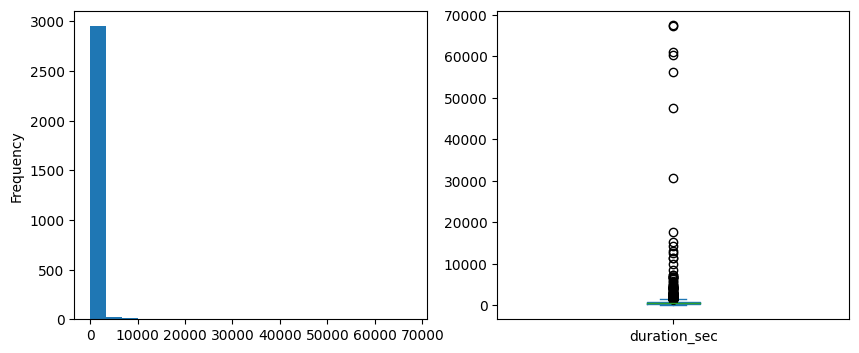

In [40]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df.duration_sec.plot(kind='hist',bins=20,ax=ax[0])
df.duration_sec.plot(kind='box',ax=ax[1])

### 5. Cari tahu berapa persentase outlier terhadap data keseluruhan.

In [44]:
q1 = df.duration_sec.quantile(0.25)
q3 = df.duration_sec.quantile(0.75)
iqr = q3-q1

upbound = q3 + 1.5*iqr
lowbound = q1 - 1.5*iqr

print(f'''
Upbound: {upbound:.4f}
Lowbound: {lowbound:.4f}
''')


Upbound: 1517.6250
Lowbound: -403.3750



In [50]:
outlier = df[(df['duration_sec'] > upbound) | (df['duration_sec'] < lowbound)]

print(f'Outlier meliputi {len(outlier.duration_sec)*100/len(df.duration_sec):.2f}% dari keseluruhan data')

Outlier meliputi 5.57% dari keseluruhan data


### 6. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

<Axes: >

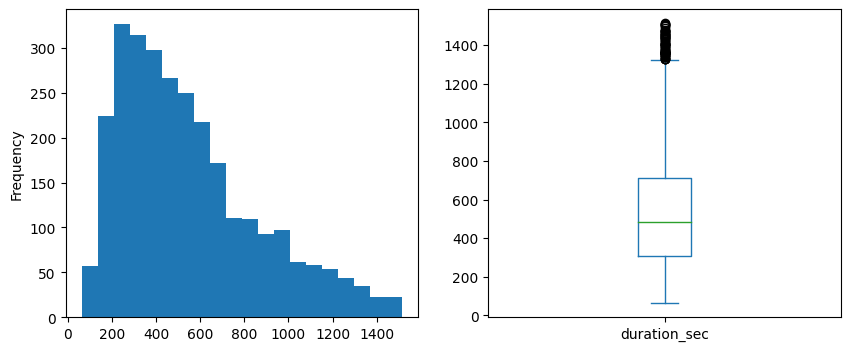

In [70]:
no_outlier = df[(df['duration_sec'] <= upbound) & (df['duration_sec'] >= lowbound)]

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.duration_sec.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.duration_sec.plot(kind='box',ax=ax[1])

In [62]:
mean_after = no_outlier.duration_sec.mean()
median_after = no_outlier.duration_sec.median()
mode_after = no_outlier.duration_sec.mode().values[0]

print(f'''
Mean: {mean_after:.2f}
Median: {median_after}
Mode: {mode_after}
''')


Mean: 549.34
Median: 481.0
Mode: 325



In [73]:
no_outlier.to_json('data_after_handling.csv')